In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Set global settings
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
# Load dataset
data = pd.read_csv(r'C:\Users\Eyo\DissertationCodes\preventingfrauddataset.csv')

C:\Users\Eyo\AppData\Local\Temp\ipykernel_37124\1124375116.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Eyo\DissertationCodes\preventingfrauddataset.csv')


In [3]:
# Display the first few rows
print(data.head(3))

   Customer Account  Amount Initiating Branch Beneficiary Bank Benef Account  \
0          197756.0   20000               NaN              GTB      16961968   
1          197756.0   20000               NaN             FCMB      71084013   
2          197756.0   20000               NaN              UBA      90488434   

      Date      Time      Status Request Ref Initiating Reference  Is Mobile  \
0  4/30/24  23:39:00  Successful  75290191.0              5290191       True   
1  4/30/24  23:37:00  Successful  75582620.0              5582620       True   
2  4/30/24  23:34:00  Successful  75606292.0              5606292       True   

     Type                 Session ID    Response Description Gateway  Is Fraud  
0  Single  1240430233917540000000000  Transaction Successful   NIBSS         0  
1  Single  1240430233714180000000000  Transaction Successful   NIBSS         0  
2  Single  1240430233448850000000000  Transaction Successful   NIBSS         0  


In [4]:
# Check dataset shape and missing values
print(data.shape)
print(data.isna().sum())


(56622, 16)
Customer Account            1
Amount                      0
Initiating Branch       49332
Beneficiary Bank         1410
Benef Account            1410
Date                        0
Time                        0
Status                      0
Request Ref              5213
Initiating Reference     8700
Is Mobile                   0
Type                     5207
Session ID               3871
Response Description     7244
Gateway                  1410
Is Fraud                    0
dtype: int64


In [5]:
# Fill missing values with mode for categorical columns
for col in ['Customer Account', 'Initiating Branch', 'Beneficiary Bank', 'Benef Account', 'Request Ref', 'Initiating Reference', 'Type', 'Session ID', 'Response Description','Gateway', 'Is Mobile', 'Is Fraud']:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\Eyo\AppData\Local\Temp\ipykernel_37124\1643529784.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Eyo\AppData\Local\Temp\ipykernel_37124\1643529784.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
print(data.isna().sum())

Customer Account        0
Amount                  0
Initiating Branch       0
Beneficiary Bank        0
Benef Account           0
Date                    0
Time                    0
Status                  0
Request Ref             0
Initiating Reference    0
Is Mobile               0
Type                    0
Session ID              0
Response Description    0
Gateway                 0
Is Fraud                0
dtype: int64


In [7]:
data

,Customer Account,Amount,Initiating Branch,Beneficiary Bank,Benef Account,Date,Time,Status,Request Ref,Initiating Reference,Is Mobile,Type,Session ID,Response Description,Gateway,Is Fraud
0,197756.0,20000,Head Office Operations,GTB,16961968,4/30/24,23:39:00,Successful,75290191.0,5290191,True,Single,1240430233917540000000000,Transaction Successful,NIBSS,0
1,197756.0,20000,Head Office Operations,FCMB,71084013,4/30/24,23:37:00,Successful,75582620.0,5582620,True,Single,1240430233714180000000000,Transaction Successful,NIBSS,0
2,197756.0,20000,Head Office Operations,UBA,90488434,4/30/24,23:34:00,Successful,75606292.0,5606292,True,Single,1240430233448850000000000,Transaction Successful,NIBSS,0
3,952283.0,40000,Head Office Operations,GTB,15297602,4/30/24,21:55:00,Successful,28511654.0,8511654,True,Single,1240430215556630000000000,Transaction Successful,NIBSS,0
4,934290.0,49000,Head Office Operations,GTB,39466640,4/30/24,21:48:00,Successful,29572576.0,9572576,True,Single,1240430214812240000000000,Transaction Successful,NIBSS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56617,22222.0,93,Head Office Operations,GTB,197508,6/13/24,00:00:00,Successful,e2de80acbaf1,HI2204071235,True,Single,90539231121140500000000000000,Transaction Successful,NIBSS,0
56618,22222.0,14400,Head Office Operations,GTB,197508,6/28/24,00:00:00,Successful,e20cf480dc77,HI2204071235,True,Single,90539231121140500000000000000,Transaction Successful,NIBSS,0
56619,22222.0,212680,Head Office Operations,GTB,197508,07/10/2024,00:00:00,Successful,e1f5ac167a5c,HI2204071235,True,Single,90539231121140500000000000000,Transaction Successful,NIBSS,0
56620,22222.0,338343,Head Office Operations,GTB,197508,07/11/2024,00:00:00,Successful,75f64507e0cc,HI2204071235,True,Single,90539231121140500000000000000,Transaction Successful,NIBSS,0


In [8]:
# Convert 'Date' and 'Time' columns to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')

In [9]:
# Check the rows with NaT values
nat_rows = data['Date'].isna()
print(f"Rows with NaT values:\n{nat_rows}")

# Fill or handle NaT values as needed, e.g., forward filling or backfilling:
data['Date'].fillna(method='ffill', inplace=True)

# Now your 'Date' column should be in a consistent format
print(data['Date'].tail())


Rows with NaT values:
0        False
1        False
2        False
3        False
4        False
         ...  
56617    False
56618    False
56619     True
56620     True
56621     True
Name: Date, Length: 56622, dtype: bool
56617   2024-06-13
56618   2024-06-28
56619   2024-06-28
56620   2024-06-28
56621   2024-06-28
Name: Date, dtype: datetime64[ns]


C:\Users\Eyo\AppData\Local\Temp\ipykernel_37124\882185820.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Date'].fillna(method='ffill', inplace=True)
C:\Users\Eyo\AppData\Local\Temp\ipykernel_37124\882185820.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Date'].fillna(method='ffill', inplace=True)


In [10]:
nat_count = data['Date'].isnull().sum()
print(nat_count)

0


In [11]:
# Extract details from the 'Time' and 'Date' columns
data['Hour'] = data['Time'].dt.hour
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

In [13]:
# Drop unnecessary columns
data.drop(columns=['Request Ref', 'Initiating Reference', 'Session ID', 'Date', 'Time', 'Customer Account', 'Benef Account', 'Is Mobile'], inplace=True)


In [24]:
data

,Amount,Is Fraud,Hour,Day,Month,Initiating Branch_Broad Street,Initiating Branch_Head Office,Initiating Branch_Head Office Operations,Initiating Branch_Yaba,Beneficiary Bank_9Payment Service Bank,...,Response Description_Transaction Status Can0t be Determined at this point.Please Contact your administrator,Response Description_Transaction Successful,Response Description_Transaction violates account tier level restrictions,Response Description_Transfer limit Exceeded,Response Description_Unable to locate record,Response Description_Unable to locate record,"Response Description_could 0t execute query\n[ SELECT this_.ID as ID107_0_, this_.Category as Category107_0_, this_.FlatAmount as FlatAmount107_0_, this_.Maximum as Maximum107_0_, this_.Minimum as Minimum107_0_, this_.Pe",Gateway_EazyPay,Gateway_ISW,Gateway_NIBSS
0,0.000132,0,1.000000,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000132,0,1.000000,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000132,0,1.000000,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000138,0,0.913043,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000141,0,0.913043,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56617,0.000126,0,0.000000,0.000000,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56618,0.000130,0,0.000000,0.833333,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56619,0.000193,0,0.000000,0.833333,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56620,0.000233,0,0.000000,0.833333,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
import joblib
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Initiating Branch', 'Beneficiary Bank', 'Status', 'Type', 'Response Description', 'Gateway']

# Initialize the encoder
encoder = OneHotEncoder()

# Fit the encoder and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_columns])

# Save the fitted encoder using joblib
joblib.dump(encoder, 'onehot_encoding.pkl')

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine the original DataFrame with the one-hot encoded columns
data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

# View the transformed DataFrame
print(data.head())



   Amount  Is Fraud  Hour  Day  Month  Initiating Branch_Broad Street  \
0   20000         0    23   30      4                             0.0   
1   20000         0    23   30      4                             0.0   
2   20000         0    23   30      4                             0.0   
3   40000         0    21   30      4                             0.0   
4   49000         0    21   30      4                             0.0   

   Initiating Branch_Head Office  Initiating Branch_Head Office Operations  \
0                            0.0                                       1.0   
1                            0.0                                       1.0   
2                            0.0                                       1.0   
3                            0.0                                       1.0   
4                            0.0                                       1.0   

   Initiating Branch_Yaba  Beneficiary Bank_9Payment Service Bank  ...  \
0                 

In [15]:
# Initialize the scaler
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = ['Amount', 'Hour', 'Day', 'Month']

# Apply the scaler to the subset of the DataFrame
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


In [16]:
data

,Amount,Is Fraud,Hour,Day,Month,Initiating Branch_Broad Street,Initiating Branch_Head Office,Initiating Branch_Head Office Operations,Initiating Branch_Yaba,Beneficiary Bank_9Payment Service Bank,...,Response Description_Transaction Status Can0t be Determined at this point.Please Contact your administrator,Response Description_Transaction Successful,Response Description_Transaction violates account tier level restrictions,Response Description_Transfer limit Exceeded,Response Description_Unable to locate record,Response Description_Unable to locate record,"Response Description_could 0t execute query\n[ SELECT this_.ID as ID107_0_, this_.Category as Category107_0_, this_.FlatAmount as FlatAmount107_0_, this_.Maximum as Maximum107_0_, this_.Minimum as Minimum107_0_, this_.Pe",Gateway_EazyPay,Gateway_ISW,Gateway_NIBSS
0,0.000132,0,1.000000,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000132,0,1.000000,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000132,0,1.000000,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000138,0,0.913043,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000141,0,0.913043,0.944444,0.272727,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56617,0.000126,0,0.000000,0.000000,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56618,0.000130,0,0.000000,0.833333,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56619,0.000193,0,0.000000,0.833333,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56620,0.000233,0,0.000000,0.833333,0.454545,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# Check for class imbalance
fraud_count = data['Is Fraud'].sum()
notfraud_count = len(data['Is Fraud']) - fraud_count
print(f"Number of True Fraud values: {fraud_count}")
print(f"Number of False Fraud values: {notfraud_count}")

Number of True Fraud values: 359
Number of False Fraud values: 56263


In [18]:
# Drop the target variable column to create X and y
X = data.drop(columns=['Is Fraud'])
y = data['Is Fraud']

In [19]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [20]:
# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [21]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [22]:
# 3. Train RandomForest with the selected features
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [37]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier(),
        "Logistic Regression": LogisticRegression()
    }
    
    # Hyperparameters for grid search
    params = {
        "Decision Tree": {'max_depth': [3, 5, 10]},
        "Random Forest": {'n_estimators': [100, 200], 'max_depth': [3, 5, 10]},
        "SVM": {'C': [0.1, 1], 'kernel': ['linear']},
        "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05]},
        "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05]},
        "Logistic Regression": {'C': [0.1, 1, 10]}
    }

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Perform grid search
        clf = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy')
        clf.fit(X_train, y_train)
        
        # Save the best model using joblib
        model_filename = f"{model_name.replace(' ', '_').lower()}.sav"
        joblib.dump(clf.best_estimator_, model_filename)
        print(f"Saved {model_name} model as {model_filename}")
        
        print(f"Best parameters for {model_name}: {clf.best_params_}")
        print(f"Cross-Validation Accuracy: {np.mean(cross_val_score(clf.best_estimator_, X_train, y_train, cv=5))}")
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Confusion matrix and classification report
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix for {model_name}:")
        print(cm)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()
        
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

        # Check accuracy for the test set
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Test Accuracy for {model_name}: {accuracy}")
        
        print("-" * 50)


Training Decision Tree...
Saved Decision Tree model as decision_tree.sav
Best parameters for Decision Tree: {'max_depth': 10}
Cross-Validation Accuracy: 0.9840304615286805
Confusion Matrix for Decision Tree:
[[8758  231]
 [  61 8954]]


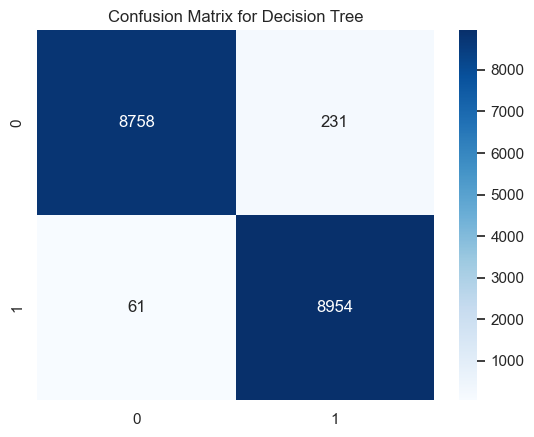

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8989
           1       0.97      0.99      0.98      9015

    accuracy                           0.98     18004
   macro avg       0.98      0.98      0.98     18004
weighted avg       0.98      0.98      0.98     18004

Test Accuracy for Decision Tree: 0.98378138191513
--------------------------------------------------

Training Random Forest...
Saved Random Forest model as random_forest.sav
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Cross-Validation Accuracy: 0.9663807040462213
Confusion Matrix for Random Forest:
[[8682  307]
 [ 228 8787]]


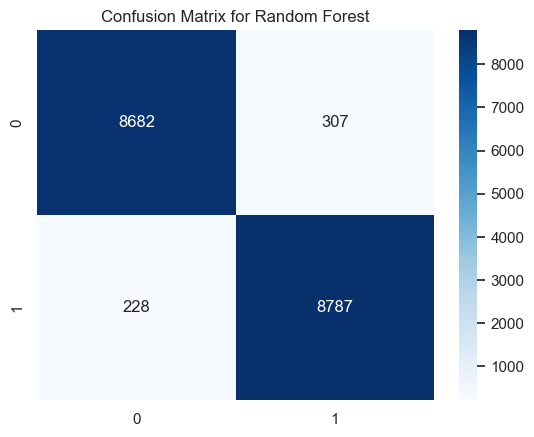

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8989
           1       0.97      0.97      0.97      9015

    accuracy                           0.97     18004
   macro avg       0.97      0.97      0.97     18004
weighted avg       0.97      0.97      0.97     18004

Test Accuracy for Random Forest: 0.9702843812486114
--------------------------------------------------

Training SVM...
Saved SVM model as svm.sav
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Cross-Validation Accuracy: 0.9028217747650764
Confusion Matrix for SVM:
[[7848 1141]
 [ 589 8426]]


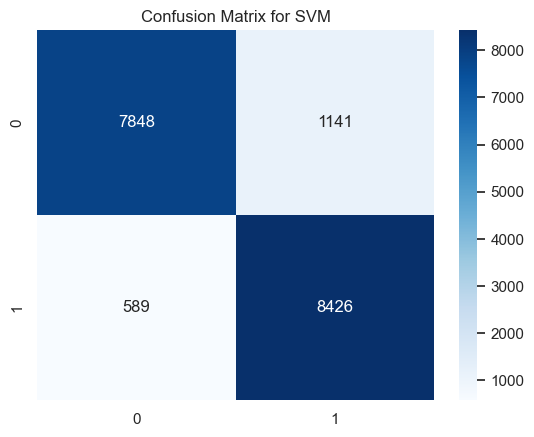

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      8989
           1       0.88      0.93      0.91      9015

    accuracy                           0.90     18004
   macro avg       0.91      0.90      0.90     18004
weighted avg       0.91      0.90      0.90     18004

Test Accuracy for SVM: 0.903910242168407
--------------------------------------------------

Training Gradient Boosting...
Saved Gradient Boosting model as gradient_boosting.sav
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Cross-Validation Accuracy: 0.9838638045085482
Confusion Matrix for Gradient Boosting:
[[8770  219]
 [  82 8933]]


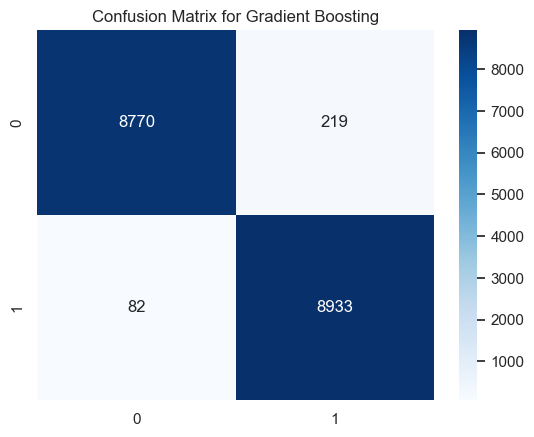

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8989
           1       0.98      0.99      0.98      9015

    accuracy                           0.98     18004
   macro avg       0.98      0.98      0.98     18004
weighted avg       0.98      0.98      0.98     18004

Test Accuracy for Gradient Boosting: 0.9832814930015552
--------------------------------------------------

Training XGBoost...
Saved XGBoost model as xgboost.sav
Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Cross-Validation Accuracy: 0.995570177342835
Confusion Matrix for XGBoost:
[[8920   69]
 [   7 9008]]


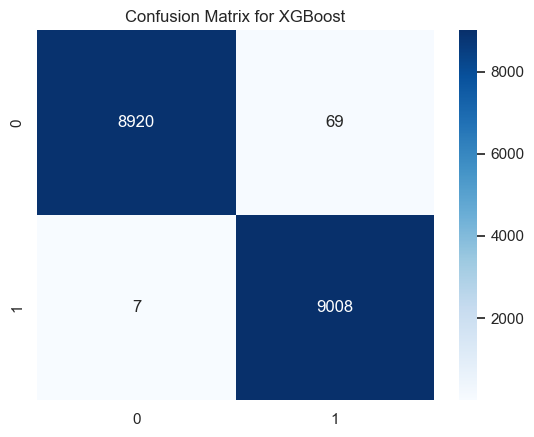

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8989
           1       0.99      1.00      1.00      9015

    accuracy                           1.00     18004
   macro avg       1.00      1.00      1.00     18004
weighted avg       1.00      1.00      1.00     18004

Test Accuracy for XGBoost: 0.9957787158409243
--------------------------------------------------

Training Logistic Regression...


C:\Users\Eyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Saved Logistic Regression model as logistic_regression.sav
Best parameters for Logistic Regression: {'C': 10}


C:\Users\Eyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Accuracy: 0.9092790569648157
Confusion Matrix for Logistic Regression:
[[7920 1069]
 [ 527 8488]]


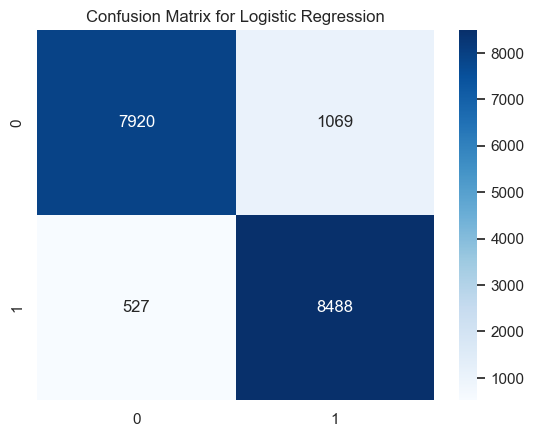

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      8989
           1       0.89      0.94      0.91      9015

    accuracy                           0.91     18004
   macro avg       0.91      0.91      0.91     18004
weighted avg       0.91      0.91      0.91     18004

Test Accuracy for Logistic Regression: 0.911353032659409
--------------------------------------------------


In [25]:
evaluate_models(X_train, X_test, y_train, y_test)

2024/09/17 06:05:48 PM, INFO, mealpy.swarm_based.GWO.GWO_WOA: Solving single objective optimization problem.
2024/09/17 06:06:10 PM, INFO, mealpy.swarm_based.GWO.GWO_WOA: >>>Problem: P, Epoch: 1, Current best: -0.9961119751166407, Global best: -0.9961119751166407, Runtime: 11.50688 seconds
2024/09/17 06:06:22 PM, INFO, mealpy.swarm_based.GWO.GWO_WOA: >>>Problem: P, Epoch: 2, Current best: -0.9966118640302155, Global best: -0.9966118640302155, Runtime: 11.49768 seconds
2024/09/17 06:06:33 PM, INFO, mealpy.swarm_based.GWO.GWO_WOA: >>>Problem: P, Epoch: 3, Current best: -0.9966118640302155, Global best: -0.9966118640302155, Runtime: 11.42035 seconds
2024/09/17 06:06:45 PM, INFO, mealpy.swarm_based.GWO.GWO_WOA: >>>Problem: P, Epoch: 4, Current best: -0.9967229504554543, Global best: -0.9967229504554543, Runtime: 11.43353 seconds
2024/09/17 06:06:56 PM, INFO, mealpy.swarm_based.GWO.GWO_WOA: >>>Problem: P, Epoch: 5, Current best: -0.9967784936680738, Global best: -0.9967784936680738, Runtime

Best Parameters from GWO: max_depth=46, min_samples_split=2, min_samples_leaf=1
Confusion Matrix for Decision Tree:
[[8961   28]
 [  28 8987]]


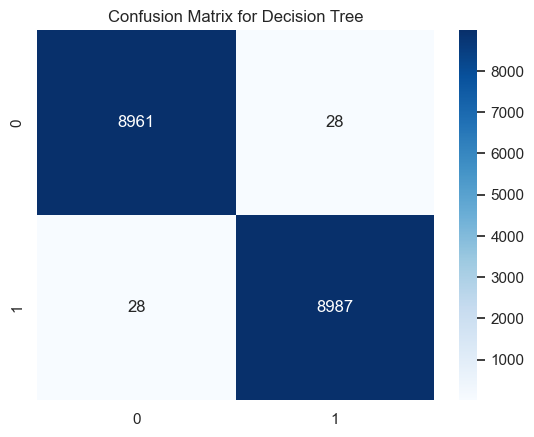

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8989
           1       1.00      1.00      1.00      9015

    accuracy                           1.00     18004
   macro avg       1.00      1.00      1.00     18004
weighted avg       1.00      1.00      1.00     18004

Test Accuracy for Decision Tree: 0.9968895800933126


['gwo_decision_tree.sav']

In [48]:
from mealpy import FloatVar, GWO

# Assume X_train, y_train, X_test, y_test are already defined

# Define objective function for GWO
def objective_function(solution):
    max_depth, min_samples_split, min_samples_leaf = solution

    # Convert solution to integers as these parameters need to be integers
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    # Train Decision Tree with current hyperparameters
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Use accuracy as the fitness measure
    accuracy = accuracy_score(y_test, y_pred)
    
    # Since GWO minimizes the objective function, return the negative accuracy
    return -accuracy

# Define problem
problem_dict = {
    "bounds": FloatVar(lb=(1, 2, 1), ub=(50, 20, 20), name="hyperparameters"),  # Example bounds for max_depth, min_samples_split, min_samples_leaf
    "minmax": "min",
    "obj_func": objective_function
}

# Apply Grey Wolf Optimization
model = GWO.GWO_WOA(epoch=20, pop_size=20) 
g_best = model.solve(problem_dict)

# Best hyperparameters found by GWO
best_max_depth, best_min_samples_split, best_min_samples_leaf = map(int, g_best.solution)
print(f"Best Parameters from GWO: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}, min_samples_leaf={best_min_samples_leaf}")

# Train the final Decision Tree with the optimized hyperparameters
final_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
final_model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = final_model.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Decision Tree:")
print(cm)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Decision Tree")
plt.show()

# Print classification report
print(f"Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

# Check accuracy for the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for Decision Tree: {accuracy}")

# Save the final model
joblib.dump(final_model, 'gwo_decision_tree.sav')


In [35]:
import mealpy
print(mealpy.__version__)


3.0.1
